<a href="https://colab.research.google.com/github/gabriel-cm-saldanha/Covid19-Analysis/blob/main/Panorama_do_COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 4.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*  

---
  

# Panorama do COVID-19 no Brasil

COVID-19 é uma doença infecciosa causada por recém-descoberto coronavírus.

Transmitido principalmente por meio de gotículas provenientes de tosses ou espirros de pessoas infectadas, a gravidade dos sintomas varia muito de pessoa para pessoa.

Fato é, não se sabe muita coisa a respeito do COVID-19. Estudos estão sendo realizados no mundo todo, porém os resultados ainda não são conclusivos e definitivos.

<center><img alt="Colaboratory logo" width="50%" src="https://static.poder360.com.br/2022/12/coronavirus-imagem-1-848x477.jpg"></center>

Até o presente momento, observa-se que cerca de 80% dos casos confirmados são assintomáticos e rápidos. A maioria das pessoas que se encaixam nesse grupo, se recupera sem nenhuma sequela.

No entanto, 15% das pessoas terão infecções graves e precisarão de oxigênio. O restante das pessoas, que representam 5%, serão classificadas como infecções muito graves e precisarão de ventilação assistida, por meio de respiradores mecânicos em ambiente hospitalar.

Com o objetivo de elevar a consciência situacional a respeito do COVID-19 no Brasil, irei realizar uma análise sobre os dados públicos da doença.

## Sobre os Dados

*Descreva a fonte dos seus dados e um breve resumo sobre o que se pode esperar desse dataset.*

*Fale sobre a dificuldade de se analisar uma doença novas, os conflitos existentes entre os dados dos governos federal, estaduais e os não oficiais.*

### Dicionário de Variáveis
* *Construa um dicionário de variáveis.*
    * `iso_code`,
    * `continent`,
    * `location`,
    * `date`,
    * `total_cases`,
    * `new_cases`,
    * `total_deaths`,
    * `new_deaths`,
    * `total_cases_per_million`,
    * `new_cases_per_million`,
    * `total_deaths_per_million`,
    * `new_deaths_per_million`,
    * `total_tests`, `new_tests`,
    * `total_tests_per_thousand`,
    * `new_tests_per_thousand`,
    * `new_tests_smoothed`,
    * `new_tests_smoothed_per_thousand`,
    * `tests_units`,
    * `stringency_index`,
    * `population`,
    * `population_density`,
    * `median_age`,
    * `aged_65_older`,
    * `aged_70_older`,
    * `gdp_per_capita`,
    * `extreme_poverty`,
    * `diabetes_prevalence`,
    * `female_smokers`,
    * `male_smokers`,
    * `handwashing_facilities`,
    * `hospital_beds_per_thousand`

    * *A descrição do nome de cada coluna pode ser encontrada [neste link](https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-data-codebook.md).*



### Obtenção dos dados do COVID-19

* Os dados utilizados nessa análise são disponibilizados neste repositório o qual é constantemente atualizado [https://github.com/owid/covid-19-data/tree/master/public/data](https://github.com/owid/covid-19-data/tree/master/public/data) e conhecer a base dados. Usaremos o formato `csv` neste projeto.

* Caso encontre algum problema em baixar diretamente do repositório oficial, você pode usar [este link](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/owid-covid-data.csv) (atualizado até 14 de junho de 2020).

*A base de dados é constantemente atualizada, podendo gerar divergência em alguns dados da análise realizada para uma nova utilização do código*

In [1]:
# importar as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

pd.set_option('display.max_columns', None)
#pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data-old.csv")
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.122,0.122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.122,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.122,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.122,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.122,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


## Análise Exploratória dos Dados

*Crie uma breve contextualização sobre o que será feito na fase de Análise Exploratória de Dados...*

### Análise Exploratória Inicial

In [3]:
print(f"Entradas:\t {df.shape[0]}")
print(f"Variáveis:\t {df.shape[1]}")

df.dtypes

Entradas:	 262423
Variáveis:	 67


iso_code                                    object
continent                                   object
location                                    object
date                                        object
total_cases                                float64
                                            ...   
population                                 float64
excess_mortality_cumulative_absolute       float64
excess_mortality_cumulative                float64
excess_mortality                           float64
excess_mortality_cumulative_per_million    float64
Length: 67, dtype: object

In [4]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [5]:
cols_list = ['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'tests_units',
       'stringency_index', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
        'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand']

In [6]:
new_df = df[cols_list].copy()
new_df.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,0.122,0.122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,41128772.0,54.422,18.6,2.581,1.337,1803.987,NaN,9.59,NaN,NaN,37.746,0.5
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,0.122,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,41128772.0,54.422,18.6,2.581,1.337,1803.987,NaN,9.59,NaN,NaN,37.746,0.5
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,0.122,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,41128772.0,54.422,18.6,2.581,1.337,1803.987,NaN,9.59,NaN,NaN,37.746,0.5
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,0.122,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,41128772.0,54.422,18.6,2.581,1.337,1803.987,NaN,9.59,NaN,NaN,37.746,0.5
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,0.122,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,41128772.0,54.422,18.6,2.581,1.337,1803.987,NaN,9.59,NaN,NaN,37.746,0.5


In [7]:
new_df['date'] = pd.to_datetime(new_df['date'])

In [8]:
obj_cols = new_df.select_dtypes(include=['object']).columns.tolist()
num_cols = new_df.select_dtypes(exclude=['object']).columns.tolist()

print(f"Variáveis categóricas:\t {len(obj_cols)}")
print(f"Variáveis numéricas:\t {len(num_cols)}")

Variáveis categóricas:	 4
Variáveis numéricas:	 28


#### Verificando Dados Nulos e Duplicados

In [9]:
(new_df.isnull().sum() / new_df.shape[0] * 100).sort_values(ascending=False).head(10)

new_tests_per_thousand             71.266619
new_tests                          71.266619
total_tests                        69.748460
total_tests_per_thousand           69.748460
new_tests_smoothed                 60.382665
new_tests_smoothed_per_thousand    60.382665
handwashing_facilities             60.344558
tests_units                        59.306921
extreme_poverty                    47.578528
male_smokers                       39.856644
dtype: float64

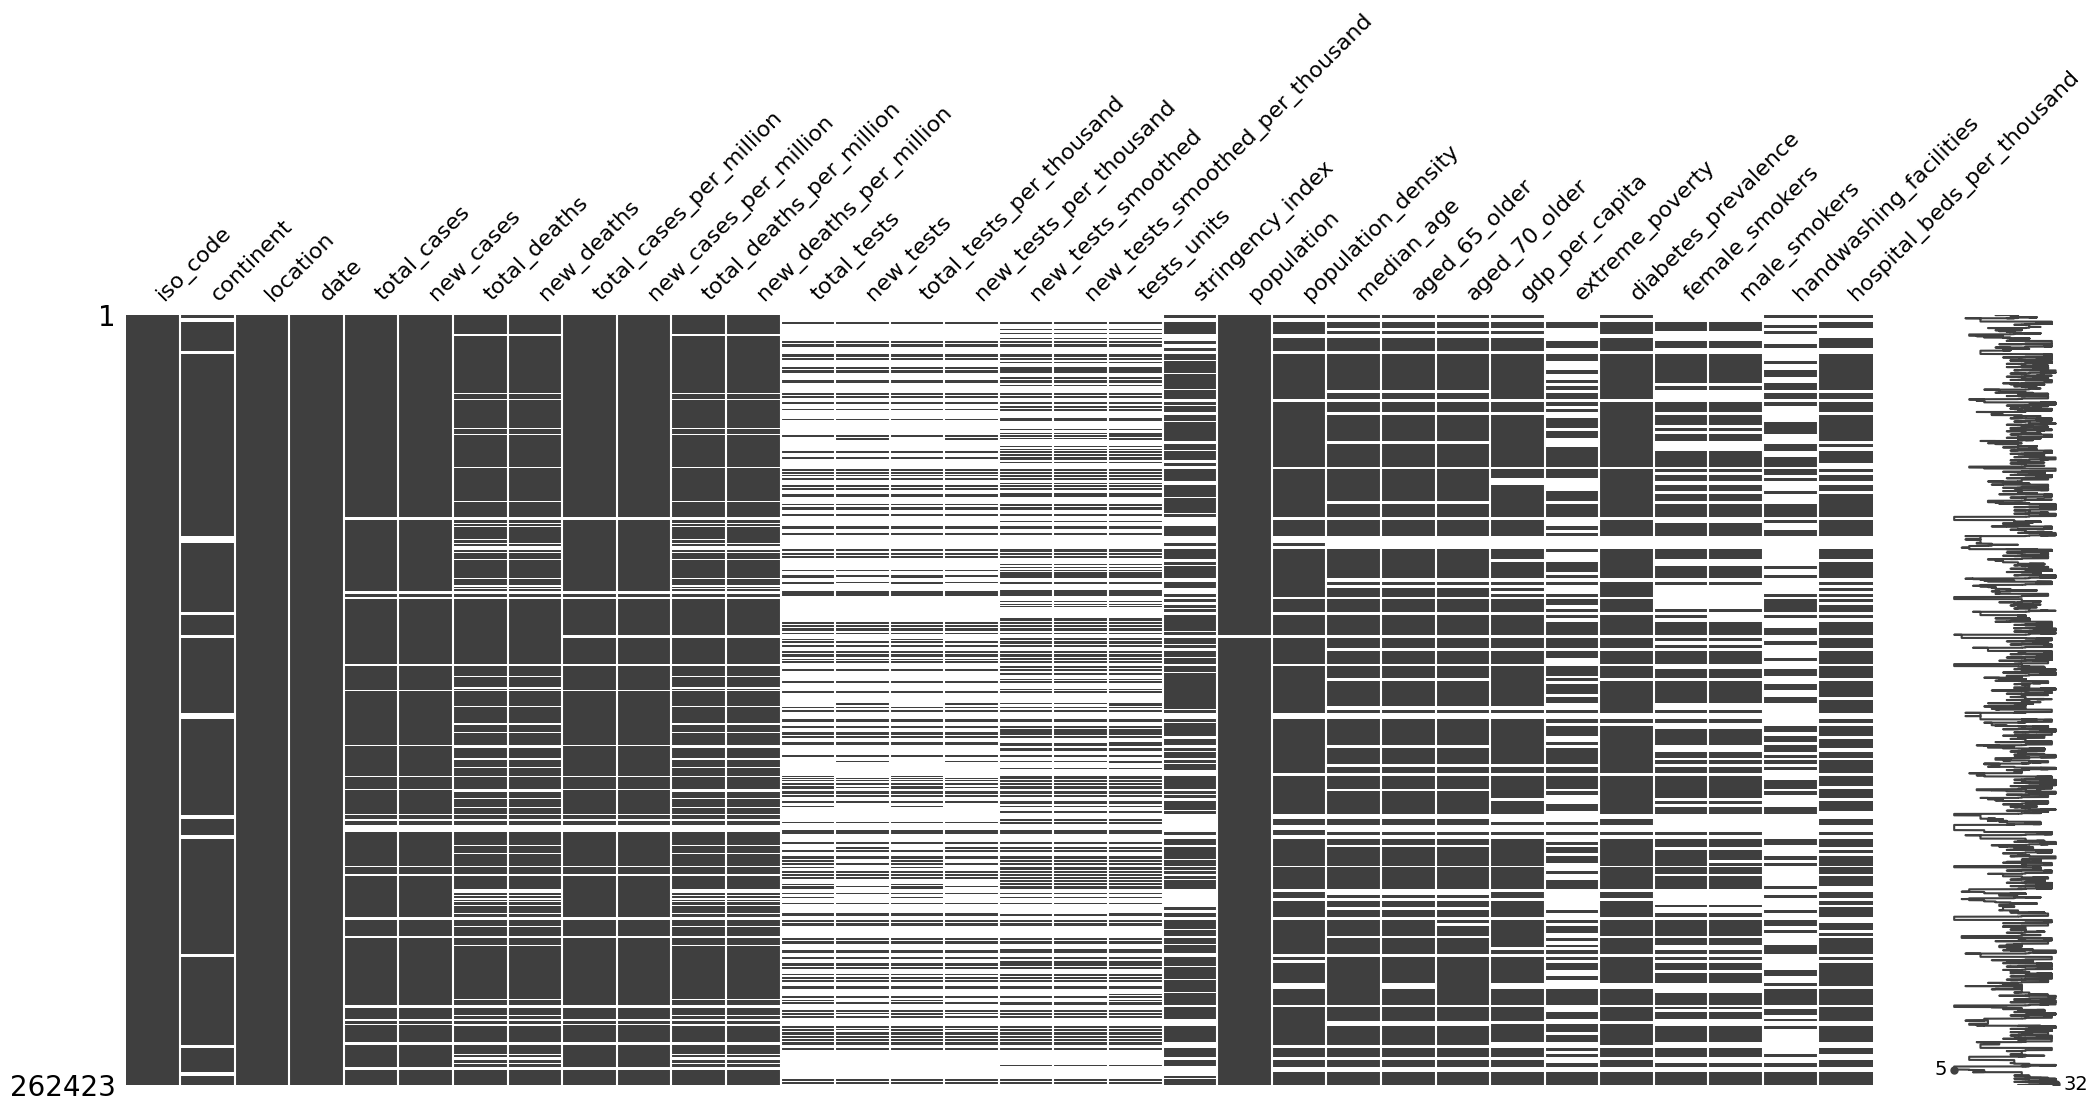

In [10]:
msno.matrix(new_df);

In [11]:
df.duplicated().sum()

0

In [12]:
max_date = new_df.date.max()
max_date

Timestamp('2023-03-07 00:00:00')

In [13]:
np.sort(new_df.iso_code.unique())

array(['ABW', 'AFG', 'AGO', 'AIA', 'ALB', 'AND', 'ARE', 'ARG', 'ARM',
       'ATG', 'AUS', 'AUT', 'AZE', 'BDI', 'BEL', 'BEN', 'BES', 'BFA',
       'BGD', 'BGR', 'BHR', 'BHS', 'BIH', 'BLR', 'BLZ', 'BMU', 'BOL',
       'BRA', 'BRB', 'BRN', 'BTN', 'BWA', 'CAF', 'CAN', 'CHE', 'CHL',
       'CHN', 'CIV', 'CMR', 'COD', 'COG', 'COK', 'COL', 'COM', 'CPV',
       'CRI', 'CUB', 'CUW', 'CYM', 'CYP', 'CZE', 'DEU', 'DJI', 'DMA',
       'DNK', 'DOM', 'DZA', 'ECU', 'EGY', 'ERI', 'ESH', 'ESP', 'EST',
       'ETH', 'FIN', 'FJI', 'FLK', 'FRA', 'FRO', 'FSM', 'GAB', 'GBR',
       'GEO', 'GGY', 'GHA', 'GIB', 'GIN', 'GMB', 'GNB', 'GNQ', 'GRC',
       'GRD', 'GRL', 'GTM', 'GUM', 'GUY', 'HKG', 'HND', 'HRV', 'HTI',
       'HUN', 'IDN', 'IMN', 'IND', 'IRL', 'IRN', 'IRQ', 'ISL', 'ISR',
       'ITA', 'JAM', 'JEY', 'JOR', 'JPN', 'KAZ', 'KEN', 'KGZ', 'KHM',
       'KIR', 'KNA', 'KOR', 'KWT', 'LAO', 'LBN', 'LBR', 'LBY', 'LCA',
       'LIE', 'LKA', 'LSO', 'LTU', 'LUX', 'LVA', 'MAC', 'MAR', 'MCO',
       'MDA', 'MDG',

In [14]:
df_codes = new_df.loc[~new_df.iso_code.str.contains(r'OWID', regex=True)]
df_codes.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,0.122,0.122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,41128772.0,54.422,18.6,2.581,1.337,1803.987,NaN,9.59,NaN,NaN,37.746,0.5
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,0.122,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,41128772.0,54.422,18.6,2.581,1.337,1803.987,NaN,9.59,NaN,NaN,37.746,0.5
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,0.122,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,41128772.0,54.422,18.6,2.581,1.337,1803.987,NaN,9.59,NaN,NaN,37.746,0.5
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,0.122,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,41128772.0,54.422,18.6,2.581,1.337,1803.987,NaN,9.59,NaN,NaN,37.746,0.5
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,0.122,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,41128772.0,54.422,18.6,2.581,1.337,1803.987,NaN,9.59,NaN,NaN,37.746,0.5


In [15]:
df_codes.loc[:,'death_rate'] = df_codes['total_deaths'] / df_codes['total_cases'] * 100

<ipython-input-15-edb91d4825f3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_codes.loc[:,'death_rate'] = df_codes['total_deaths'] / df_codes['total_cases'] * 100


In [16]:
code_list = df_codes.loc[df_codes.date == df_codes.date.max()].sort_values(by="total_cases", ascending=False).head(10)['iso_code'].tolist()
filtered_codes = df_codes.loc[df_codes.iso_code.isin(code_list)]

In [20]:
code_list

['USA', 'IND', 'FRA', 'DEU', 'BRA', 'JPN', 'KOR', 'ITA', 'GBR', 'RUS']

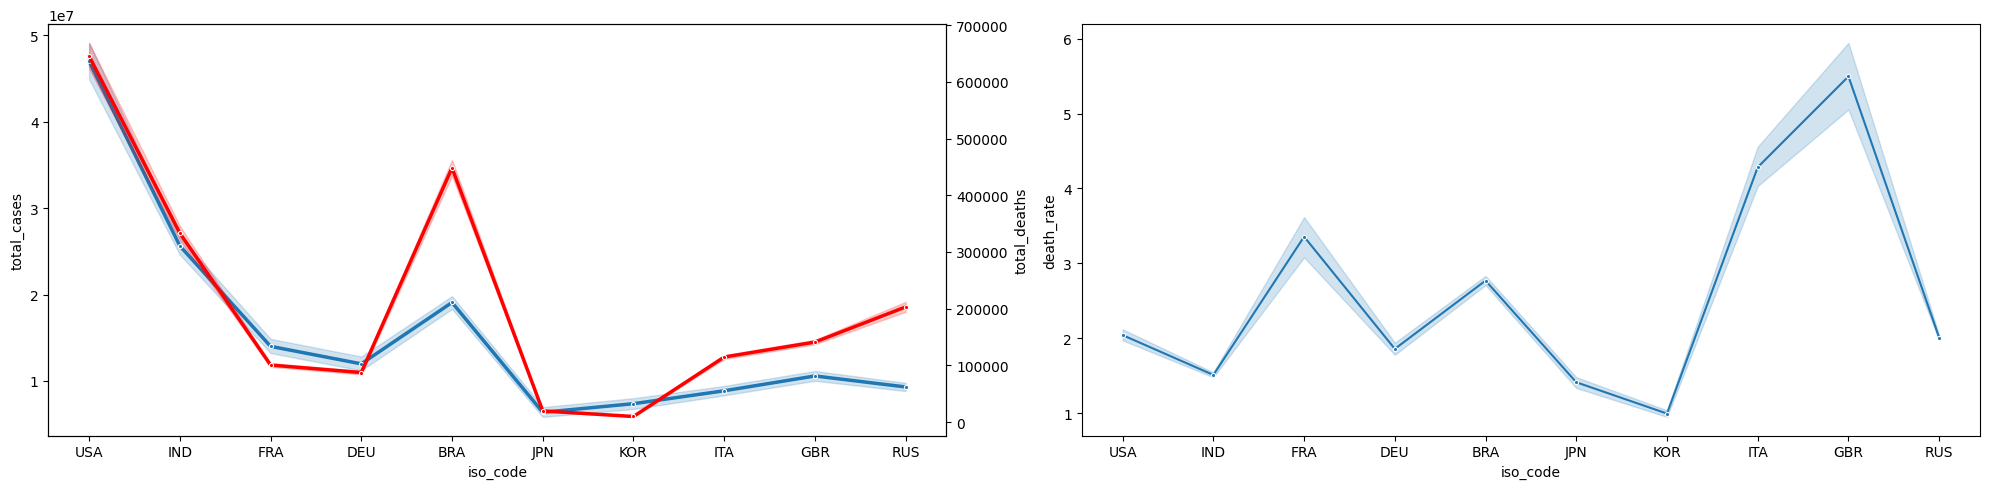

In [24]:
fig, ax = plt.subplots(ncols=2, figsize=(20, 5))

ax1 = sns.lineplot(x="iso_code", y="total_cases",
                 data=filtered_codes.sort_values(by="total_cases", ascending=False),
                  marker='.', linewidth=2.5, ax=ax[0])

ax2 = ax1.twinx()

ax2 = sns.lineplot(x="iso_code", y="total_deaths",
                 data=filtered_codes.sort_values(by="total_cases", ascending=False),
                  marker='.', linewidth=2.5, color='r')

ax3 = sns.lineplot(x="iso_code", y="death_rate",
                 data=filtered_codes.sort_values(by="total_cases", ascending=False),
                   marker='.',ax=ax[1])

plt.tight_layout()

<ipython-input-18-e902e6b1a6f9>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax.get_xticklabels(), rotation=60)


Text(0.5, 1.0, 'Casos e Mortes no Mundo')

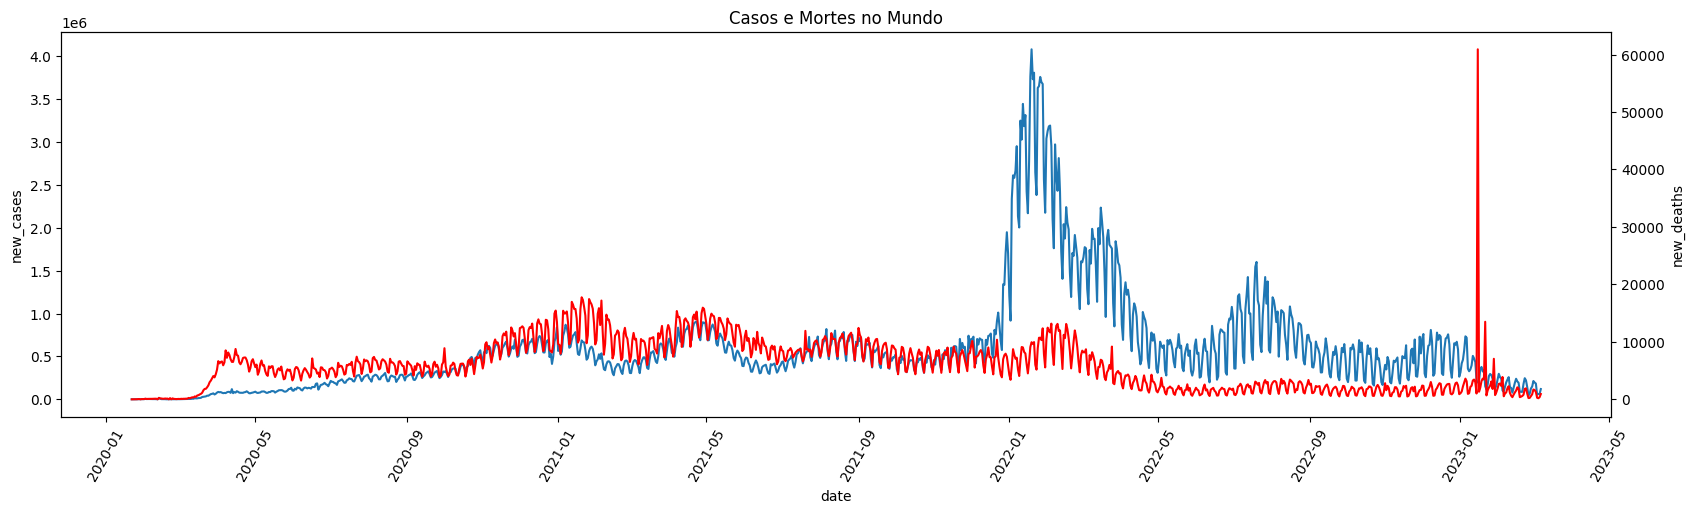

In [18]:
fig, ax = plt.subplots(figsize=(20, 5))
ax1 = sns.lineplot(x="date", y="new_cases", data=new_df.loc[new_df.iso_code == 'OWID_WRL'])
ax1.set_xticklabels(ax.get_xticklabels(), rotation=60)

ax2 = ax1.twinx()
ax2 = sns.lineplot(x="date", y="new_deaths", data=new_df.loc[new_df.iso_code == 'OWID_WRL'], color='r');

ax1.set_title('Casos e Mortes no Mundo')

### Análise Exploratória para o Brasil

* Criar uma cópia do DataFrame apenas com o Brasil
    * `df_brasil = df.loc[df.location == "Brazil"].copy()`
* Identificar quando foi registrada a primeira morte no Brasil
* Identificar quantos dias demorou para registrarmos a primeira morte, considerando o primeiro caso de COVID-19 registrado.
* Plotar gráficos de linha em escalas linear e logarítmica para os casos totais e mortes totais.

## Conclusão

*Escreva suas conclusões e análises sobre os dados relativos à COVID-19...*